# **Assignment 5: NLP**

### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: Raksha Chandrashekar
### UNI: rc3729

### Natural Language Processing
We will train a supervised training model to predict if a tweet has a positive or negative sentiment.

####  **Dataset loading & dev/test splits**

**1.1) Load the twitter dataset from NLTK library**

In [1]:
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**1.2) Load the positive & negative tweets**

In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

**1.3) Make a data frame that has all tweets and their corresponding labels**

In [3]:
# Your Code Here
positive_label = [1] * len(all_positive_tweets)
negative_label = [0] * len(all_negative_tweets)

all_tweets = all_positive_tweets + all_negative_tweets
all_labels = positive_label + negative_label

df = pd.DataFrame({'tweets': all_tweets, 'labels': all_labels})
print(df.shape)
df.head()

(10000, 2)


,tweets,labels
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1


**1.4) Look at the class distribution of the tweets**

labels
1    5000
0    5000
Name: count, dtype: int64


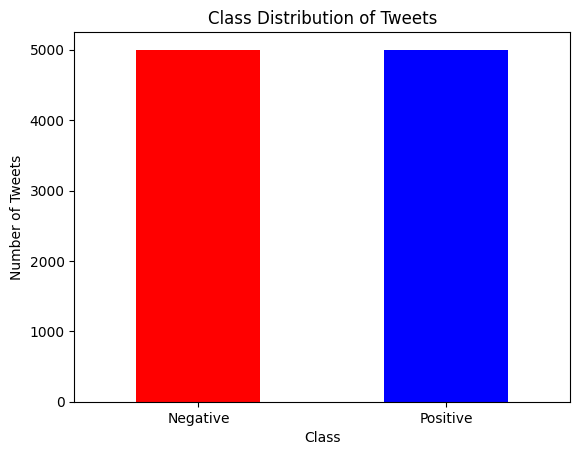

In [4]:
# Your Code Here
class_distribution = df['labels'].value_counts()
print(class_distribution)
class_distribution.plot(kind='bar', color=['red', 'blue'])
plt.title("Class Distribution of Tweets")
plt.xlabel("Class")
plt.ylabel("Number of Tweets")
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

Both the 'Negative' and 'Positive' classes are balanced.

**1.5) Create a development & test split (80/20 ratio):**

In [5]:
# Your Code Here
X_dev, X_test, y_dev, y_test = train_test_split(df['tweets'], df['labels'], test_size=0.2, random_state=42)
print("Shape of Training Tweets: ", X_dev.shape)
print("Shape of Testing Tweets: ", X_test.shape)
print("Shape of Trainign Labels: ", y_dev.shape)
print("Shape of Testing Labels: ", y_test.shape)

Shape of Training Tweets:  (8000,)
Shape of Testing Tweets:  (2000,)
Shape of Trainign Labels:  (8000,)
Shape of Testing Labels:  (2000,)


In [6]:
print(X_dev.head())
print("----------------------------------------------------------")
print(X_test.head())
print("----------------------------------------------------------")
print(df.head())

9254                                          :((((( matt
1561       @Lachdog_AU @Posica all good, thanks anyway :)
1670                                     my bf is mean :)
6087                               zzzz missed my stop :(
6669    @bexmader that means 3am for me in Australia :(((
Name: tweets, dtype: object
----------------------------------------------------------
6252    I love you, how but you? @Taecyeon2pm8 did you...
4684    @mayusushita @dildeewana_ @sonalp2591 @deepti_...
1731    Your love, O Lord, is better than life. :) &lt...
4742    @yasminyasir96 yeah but it will be better if w...
4521    Ok good night I wish troye wasn't ugly and I m...
Name: tweets, dtype: object
----------------------------------------------------------
                                              tweets  labels
0  #FollowFriday @France_Inte @PKuchly57 @Milipol...       1
1  @Lamb2ja Hey James! How odd :/ Please call our...       1
2  @DespiteOfficial we had a listen last night :)...       1
3 

#### **Data preprocessing**
We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You can use the `re` package in python to find and replace these strings.

**1.6) Replace the `#` symbol with '' in every tweet**

In [7]:
# Your Code Here
df['tweets'] = df['tweets'].str.replace('#', '', regex=False)
pd.set_option('display.max_colwidth', None)
print(df.head())

                                                                                                                           tweets  \
0                  FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)   
1  @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!   
2                     @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!   
3                                                                                                            @97sides CONGRATS :)   
4                      yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days   

   labels  
0       1  
1       1  
2       1  
3       1  
4       1  


**1.7) Replace hyperlinks with '' in every tweet**

In [8]:
# Your Code Here
removeHandle = lambda x: re.sub(r'@\w*', '', x)
removeURL = lambda x: re.sub(r'http\S+', '', x)
# df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
df['tweets'] = df['tweets'].apply(lambda x: removeURL(removeHandle(x)))
pd.set_option('display.max_colwidth', None)
df['tweets'].head()


,tweets
0,FollowFriday for being top engaged members in my community this week :)
1,Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
2,we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
3,CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days


**NOTE:** removing punctuation (1.9) is executed before removing stop words (1.8) as removing stop words will cause words like "and." or "but," to remain in the text because the punctuation prevents them from matching the stop words list.

**1.9) Remove Punctuation**

In [12]:
# Your Code Here
df['tweets'] = df['tweets'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['tweets'].head()

,tweets
0,FollowFriday top engaged members community week
1,Hey James odd Please call Contact Centre 02392441234 able assist Many thanks
2,listen last night Bleed amazing track Scotland
3,CONGRATS
4,yeaaaah yippppy accnt verified rqst succeed got blue tick mark fb profile 15 days


**1.8) Remove all stop words**

In [13]:
# Your Code Here
stop_words = set(stopwords.words('english'))
print(stop_words)
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df['tweets'].head()

{'ours', 'here', "it'd", "you'll", 'needn', 'hadn', 'few', 'we', 'whom', 'yourselves', 'a', 'did', 'off', 'after', "they've", 'been', 'while', 'during', 'above', "you're", 'too', "needn't", 'me', "it's", 'from', "should've", 'll', "he'd", "she'd", 'hers', "won't", 'no', "haven't", 'he', 'him', 've', 'further', 'by', 'each', 'does', 'very', "wasn't", "we're", 'just', 'doesn', 'for', 'such', 'and', 'more', 'being', "they'd", 'his', 'at', 'am', 'should', 'what', 'some', 'who', 'wouldn', 'that', 'about', "he's", 'before', 'i', 'itself', 'were', 'are', 'you', 'aren', 'ain', 'y', 'over', 'having', 'can', 'into', "he'll", 'theirs', 'why', 'below', "i'm", "don't", 'than', 'our', 'any', "weren't", "we'll", "mustn't", 're', 'nor', 'himself', "hasn't", "hadn't", 'of', 'out', 'these', 'once', 'has', 'with', "mightn't", 'my', 'then', 'is', 'now', 'ourselves', 'o', 'your', "didn't", 'myself', 'don', 'mustn', "she'll", "we've", "shouldn't", 'so', "i've", 'because', "doesn't", 'if', 'm', "you'd", "sha

,tweets
0,FollowFriday top engaged members community week
1,Hey James odd Please call Contact Centre 02392441234 able assist Many thanks
2,listen last night Bleed amazing track Scotland
3,CONGRATS
4,yeaaaah yippppy accnt verified rqst succeed got blue tick mark fb profile 15 days


**1.9) Remove all punctuations**

In [26]:
# Your Code Here

''' Completed before removing stop words (1.8) '''

# df['tweets'] = df['tweets'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# df['tweets'].head()

' Completed before removing stop words (1.8) '

In [16]:
X_dev.head()

,tweets
9254,:((((( matt
1561,"@Lachdog_AU @Posica all good, thanks anyway :)"
1670,my bf is mean :)
6087,zzzz missed my stop :(
6669,@bexmader that means 3am for me in Australia :(((


**1.10) Apply stemming on the development & test datasets using Porter algorithm**

In [17]:
# Your Code Here
ps = PorterStemmer()
def stem_word(tweet):
  return ' '.join([ps.stem(word) for word in tweet.split()])

df['tweets'] = df['tweets'].apply(stem_word)
print(df['labels'].value_counts())
df.head(10)

labels
1    5000
0    5000
Name: count, dtype: int64


,tweets,labels
0,followfriday top engag member commun week,1
1,hey jame odd pleas call contact centr 02392441234 abl assist mani thank,1
2,listen last night bleed amaz track scotland,1
3,congrat,1
4,yeaaaah yippppi accnt verifi rqst succeed got blue tick mark fb profil 15 day,1
5,one irresist flipkartfashionfriday,1
6,dont like keep love custom wait long hope enjoy happi friday lwwf,1
7,second thought there’ enough time dd new short enter system sheep must buy,1
8,jgh go bayan bye,1
9,act mischiev call etl layer inhous wareh app katamari well… name impli p,1


Displaying Word Cloud for Negative (0) Tweets


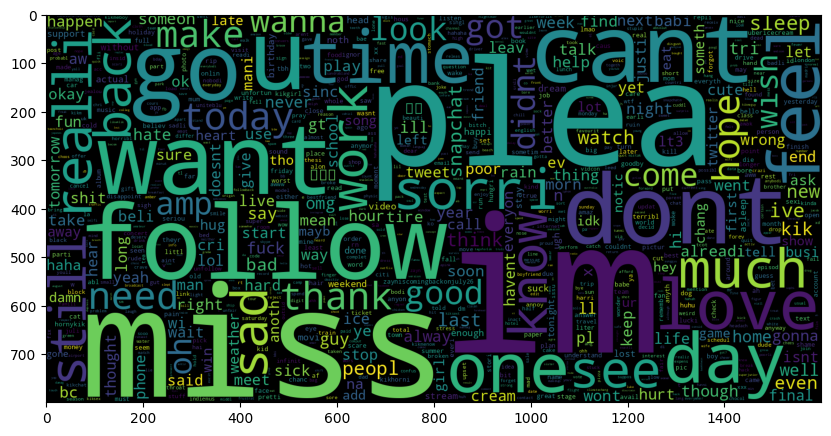

In [18]:
from wordcloud import WordCloud

t = df[df.labels==0].drop(['labels'], axis=1)

print('Displaying Word Cloud for Negative (0) Tweets')
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(t.tweets))
plt.imshow(wc);

Displaying Word Cloud for Positive (1) Tweets


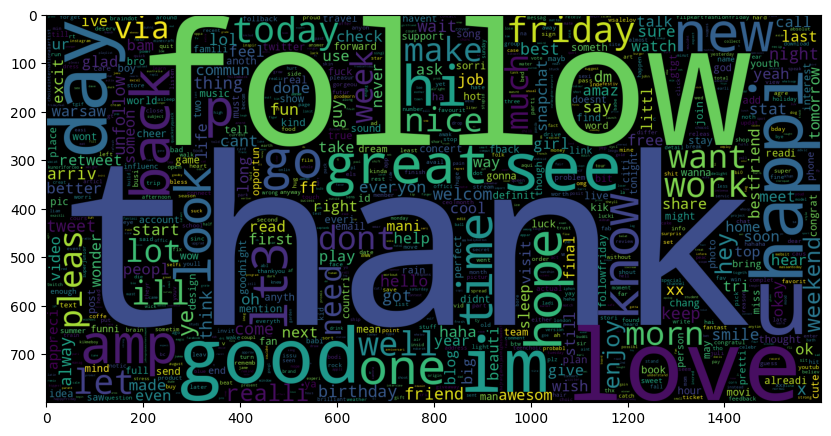

In [19]:
t = df[df.labels==1].drop(['labels'], axis=1)

print('Displaying Word Cloud for Positive (1) Tweets')
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(t.tweets))
plt.imshow(wc);

#### **Model training**

**1.11) Create bag of words features for each tweet in the development dataset**

In [20]:
# Your Code Here
print(X_dev.head())
print("------------------------------------------------------")
vectorizer = CountVectorizer()
X_dev_bow = vectorizer.fit_transform(X_dev)
bow_df = pd.DataFrame(X_dev_bow.toarray(), columns=vectorizer.get_feature_names_out())
print(X_dev.head())
print("----------------------------------------------------------")
print(bow_df.head())
print(df['labels'].value_counts())

9254                                          :((((( matt
1561       @Lachdog_AU @Posica all good, thanks anyway :)
1670                                     my bf is mean :)
6087                               zzzz missed my stop :(
6669    @bexmader that means 3am for me in Australia :(((
Name: tweets, dtype: object
------------------------------------------------------
9254                                          :((((( matt
1561       @Lachdog_AU @Posica all good, thanks anyway :)
1670                                     my bf is mean :)
6087                               zzzz missed my stop :(
6669    @bexmader that means 3am for me in Australia :(((
Name: tweets, dtype: object
----------------------------------------------------------
   00  000  001  00128835  009  00962778381838  00am  00kouhey00  00yckce7wj  \
0   0    0    0         0    0               0     0           0           0   
1   0    0    0         0    0               0     0           0           0   
2   0    0

In [28]:
# # Printing frequency of word>0
# for idx in non_zero_rows.index:
#     tweet = df['tweets'].iloc[idx]
#     # Get the non-zero values and their corresponding words
#     non_zero_values = non_zero_rows.loc[idx][non_zero_rows.loc[idx] != 0]

#     print(f"Tweet: {tweet}")
#     # Print only non-zero values and corresponding words
#     for word, value in non_zero_values.items():
#         print(f"Word: {word}, Count: {value}")

#     print("--------------------------------------------------")


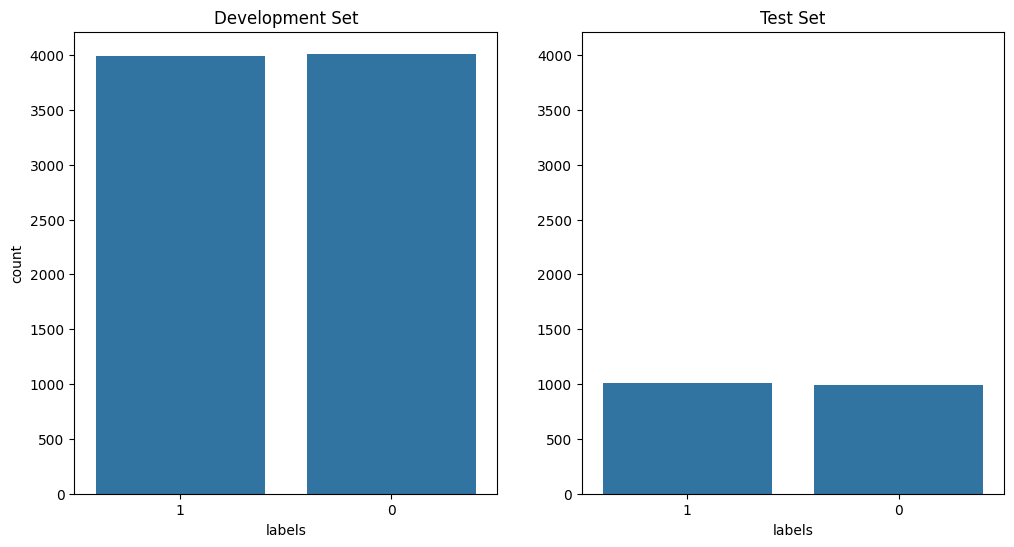

In [21]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

sns.countplot(x=y_dev, order=[1, 0], ax=ax[0])
sns.countplot(x=y_test, order=[1, 0], ax=ax[1])

ax[0].set_title('Development Set')
ax[1].set_title('Test Set')
ax[1].yaxis.set_tick_params(labelbottom=True)

**1.12) Train a Logistic Regression model on the development dataset**

In [22]:
# Your Code Here
model = LogisticRegression()
model.fit(X_dev_bow, y_dev)

predictions_bow = model.predict(X_dev_bow)
accuracy_bow = accuracy_score(y_dev, predictions_bow)
print(f"Accuracy: {accuracy_bow:.4f}")

Accuracy: 0.9594


**1.13) Create TF-IDF features for each tweet in the development dataset**

In [23]:
# Your Code Here
print(X_dev.head())
tf = TfidfVectorizer()
X_dev_tfidf = tf.fit_transform(X_dev)
tfidf = pd.DataFrame(X_dev_tfidf.toarray(), columns=tf.get_feature_names_out())
print(tfidf.head())
print(df['labels'].value_counts())

9254                                          :((((( matt
1561       @Lachdog_AU @Posica all good, thanks anyway :)
1670                                     my bf is mean :)
6087                               zzzz missed my stop :(
6669    @bexmader that means 3am for me in Australia :(((
Name: tweets, dtype: object
    00  000  001  00128835  009  00962778381838  00am  00kouhey00  00yckce7wj  \
0  0.0  0.0  0.0       0.0  0.0             0.0   0.0         0.0         0.0   
1  0.0  0.0  0.0       0.0  0.0             0.0   0.0         0.0         0.0   
2  0.0  0.0  0.0       0.0  0.0             0.0   0.0         0.0         0.0   
3  0.0  0.0  0.0       0.0  0.0             0.0   0.0         0.0         0.0   
4  0.0  0.0  0.0       0.0  0.0             0.0   0.0         0.0         0.0   

    01  ...  غردلي  للحياة  للعودة  مطعم_هاشم   다쇼   더쇼  에이핑크  인피니트   ｍｅ  ｓｅｅ  
0  0.0  ...    0.0     0.0     0.0        0.0  0.0  0.0   0.0   0.0  0.0  0.0  
1  0.0  ...    0.0     0.0     0.0 

**1.14) Train the Logistic Regression model on the development dataset with TF-IDF features**

In [24]:
# Your Code Here
predictions_tfidf = model.predict(X_dev_tfidf)
accuracy_tfidf = accuracy_score(y_dev, predictions_tfidf)
print(f"Accuracy: {accuracy_tfidf:.4f}")

Accuracy: 0.9604


**1.15) Compare the performance of the two models on the test dataset using a classification report and the scores obtained. Explain the difference in results obtained.**

In [25]:
# Your Code Here
model_bow = LogisticRegression()
model_bow.fit(X_dev_bow, y_dev)
X_test_bow = vectorizer.transform(X_test)
predictions_test_bow = model_bow.predict(X_test_bow)
accuracy_test_bow = accuracy_score(y_test, predictions_test_bow)
classification_report_bow = classification_report(y_test, predictions_test_bow)
print("Classification Report for Bag of Words (BOW) Features: \n")
print(f"BOW Model Accuracy: {accuracy_test_bow:.4f}")
print("BOW Model Classification Report: \n")
print(classification_report_bow)

model_tfidf = LogisticRegression()
model_tfidf.fit(X_dev_tfidf, y_dev)
X_test_tfidf = tf.transform(X_test)
predictions_test_tfidf = model_tfidf.predict(X_test_tfidf)
accuracy_test_tfidf = accuracy_score(y_test, predictions_test_tfidf)
classification_report_tfidf = classification_report(y_test, predictions_test_tfidf)
print("Classification Report for TF-IDF Features: \n")
print(f"TF-IDF Model Accuracy: {accuracy_test_tfidf:.4f}")
print("TF-IDF Model Classification Report: \n")
print(classification_report_tfidf)

Classification Report for Bag of Words (BOW) Features: 

BOW Model Accuracy: 0.7675
BOW Model Classification Report: 

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       988
           1       0.79      0.74      0.76      1012

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000

Classification Report for TF-IDF Features: 

TF-IDF Model Accuracy: 0.7720
TF-IDF Model Classification Report: 

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       988
           1       0.79      0.75      0.77      1012

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



*Explanation here<br>
The TF-IDF model performs slightly better than the Bag of Words model as we can see from the classification report output above.<br>
This is because TF-IDF gives more importance to unique or rare and less common words, whereas BOW gives the same importance to all the words. Therefore, TF-IDF helps the model to focus on more meaningful words which leads to slightly more accurate predictions. Also, TF-IDF provides some context by down-weighting overly common words (for example, the, is etc), which helps the classifier focus on content that is more discriminative.<br>
We can also see that both models have a balance between precision and accuracy.
